a) Provide a description of the dataset.

We plan to use a dataset of cat sounds curated for better understanding of cat behavior, or more specifically, the emotion classification of cats. This dataset is organized to include a total of 10 categories, each representing a different emotional state of a cat: happiness, fighting, defensive behavior, anger, warning, resting, pain, calling for its mother, mating, and hunting desire, which will be used as class labels for the classifier. It's a balanced dataset, with each category containing approximately 600 sound files of cat sounds.
You may find more detailed information regarding the distributions of the dataset in this notebook.


b) Discuss any potential data issues outlined above and in the linked Ed slide.

There is no missing data in our dataset. The classes are balanced. However, there are inconsistencies in both the format of the data and the number of channels. 


c) Explain how these issues have been or will be addressed before the next milestone.

During preprocessing, we have transformed the audio in the form of .mp3 files to .wav files to comply with the python packages. We also converted the stereo input (2 channels) into mono (1 channel). 

## Loading Data

In [2]:
!pip install pydub

In [3]:
!git clone https://github.com/JiaaiShen/meow_meow.git

Cloning into 'meow_meow'...
remote: Enumerating objects: 11873, done.
remote: Total 11873 (delta 0), reused 0 (delta 0), pack-reused 11873
Receiving objects: 100% (11873/11873), 2.25 GiB | 21.16 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Updating files: 100% (11853/11853), done.


In [4]:
%cd meow_meow

/content/meow_meow


## Converting .mp3 audios to .wav (NO NEED TO RUN in the future)

In [5]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp
import os

In [6]:
import pandas as pd

In [ ]:
all_categories = ['Angry', 'Defence', 'Fighting', 'Happy', 'HuntingMind', 'Mating', 'MotherCall', 'Paining', 'Resting', 'Warning']
base_dir = 'catsound/'
output_base_dir = 'catsound_wav/'

if not os.path.exists(output_base_dir):
    os.mkdir(output_base_dir)

for category in all_categories:
    dir_path = os.path.join(base_dir, category)
    output_dir = os.path.join(output_base_dir, category)

    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

    for filename in os.listdir(dir_path):
        if filename.endswith(".mp3"):
            file_path = os.path.join(dir_path, filename)
            wav_filename = os.path.splitext(filename)[0] + '.wav'
            output_file_path = os.path.join(output_dir, wav_filename)
            mp3_audio = AudioSegment.from_file(file_path, format="mp3")
            mp3_audio.export(output_file_path, format="wav")
            print(f"Converted and saved: {output_file_path}")

流式输出内容被截断，只能显示最后 5000 行内容。
Converted and saved: catsound_wav/Defence/LastEntry_cat1341Hiss_aug1(1).wav
Converted and saved: catsound_wav/Defence/LastEntry_cat1327Hiss_aug1(1).wav
Converted and saved: catsound_wav/Defence/Cat_YoutubeLLT42363.wav
Converted and saved: catsound_wav/Defence/Cat_Hiss10056_aug1(1).wav
Converted and saved: catsound_wav/Defence/car_extcoll0287.wav
Converted and saved: catsound_wav/Defence/LastEntry_cat1312Hiss.wav
Converted and saved: catsound_wav/Defence/cat_flickr01364.wav
Converted and saved: catsound_wav/Defence/cat08.wav
Converted and saved: catsound_wav/Defence/LastEntry_cat1091Hiss_aug1(1).wav
Converted and saved: catsound_wav/Defence/Cat_Hass1050.wav
Converted and saved: catsound_wav/Defence/Cat_HIss10036.wav
Converted and saved: catsound_wav/Defence/LastEntry_cat1001Hiss_aug1(1).wav
Converted and saved: catsound_wav/Defence/Cat_Hass1043.wav
Converted and saved: catsound_wav/Defence/Last_addCat331Hiss.wav
Converted and saved: catsound_wav/Defence/Cat_Hi

In [ ]:
!zip -r catsound_wav.zip catsound_wav/

流式输出内容被截断，只能显示最后 5000 行内容。
  adding: catsound_wav/Paining/Online_Cat0486Pil.wav (deflated 16%)
  adding: catsound_wav/Paining/cat_coll0171_aug1(1).wav (deflated 18%)
  adding: catsound_wav/Paining/cat19_aug1(1).wav (deflated 14%)
  adding: catsound_wav/Paining/cat_flickr0189.wav (deflated 15%)
  adding: catsound_wav/Paining/Online_Cat0327help_aug1(1).wav (deflated 28%)
  adding: catsound_wav/Paining/cat_coll0147.wav (deflated 28%)
  adding: catsound_wav/Paining/cat_coll0177_aug1(1).wav (deflated 13%)
  adding: catsound_wav/Paining/Online_Cat0320hpy_aug1(1).wav (deflated 9%)
  adding: catsound_wav/Paining/cat06.wav (deflated 12%)
  adding: catsound_wav/Paining/Edit9098Hlp_aug1(1).wav (deflated 11%)
  adding: catsound_wav/Paining/Cat_YoutubeLLT42451.wav (deflated 32%)
  adding: catsound_wav/Paining/cat05_aug1(1).wav (deflated 11%)
  adding: catsound_wav/Paining/cat_youtube01250_aug1(1).wav (deflated 20%)
  adding: catsound_wav/Paining/Last_addCat129575Res_aug1(1).wav (deflated 19%)
  add

## Converting Stereo to Mono （NO NEED TO RUN in the future）

In [101]:
all_categories = ['Angry', 'Defence', 'Fighting', 'Happy', 'HuntingMind', 'Mating', 'MotherCall', 'Paining', 'Resting', 'Warning']
base_dir = 'catsound_wav/'
output_base_dir = 'catsound_wav_mono/'

if not os.path.exists(output_base_dir):
    os.mkdir(output_base_dir)

for category in all_categories:
    dir_path = os.path.join(base_dir, category)
    output_dir = os.path.join(output_base_dir, category)

    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

    for filename in os.listdir(dir_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(dir_path, filename)
            output_filename = os.path.splitext(filename)[0] + '_mono.wav'
            output_file_path = os.path.join(output_dir, output_filename)
            wav_stereo = AudioSegment.from_wav(file_path)
            wav_mono = wav_stereo.set_channels(1)
            wav_mono.export(output_file_path, format="wav")
            print(f"Converted and saved: {output_file_path}")

流式输出内容被截断，只能显示最后 5000 行内容。
Converted and saved: catsound_wav_mono/Defence/Edit9053Hiss_mono.wav
Converted and saved: catsound_wav_mono/Defence/Last_addCat276Hiss_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/car_extcoll0164_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/LastEntry_cat1347Hiss_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/Cat_Hiss10065_mono.wav
Converted and saved: catsound_wav_mono/Defence/Cat_Hiss10044_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/Cat_Hiss1083_mono.wav
Converted and saved: catsound_wav_mono/Defence/cat11_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/Edit9061Hiss_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/cat_flickr0154_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/LastEntry_cat1096Hiss_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/Edit9062Hiss_aug1(1)_mono.wav
Converted and saved: catsound_wav_mono/Defence/La

In [102]:
!zip -r catsound_wav_mono.zip catsound_wav_mono/

流式输出内容被截断，只能显示最后 5000 行内容。
  adding: catsound_wav_mono/Resting/purr4 (2)_mono.wav (deflated 26%)
  adding: catsound_wav_mono/Resting/purr4 (2)_aug1(1)_mono.wav (deflated 19%)
  adding: catsound_wav_mono/Resting/LastEntry_cat1260Purr_aug1(1)_mono.wav (deflated 15%)
  adding: catsound_wav_mono/Resting/cat_flickr01329_mono.wav (deflated 44%)
  adding: catsound_wav_mono/Resting/LastEntry_cat1214Purr_mono.wav (deflated 36%)
  adding: catsound_wav_mono/Resting/cat_flickr01401_aug1(1)_mono.wav (deflated 28%)
  adding: catsound_wav_mono/Resting/catpurring259_mono.wav (deflated 24%)
  adding: catsound_wav_mono/Resting/cat_youtube01286_mono.wav (deflated 23%)
  adding: catsound_wav_mono/Resting/cat_youtube01326_mono.wav (deflated 26%)
  adding: catsound_wav_mono/Resting/catpurring028_aug1(1)_mono.wav (deflated 4%)
  adding: catsound_wav_mono/Resting/LastEntry_cat1027Purr_mono.wav (deflated 40%)
  adding: catsound_wav_mono/Resting/cat05_mono.wav (deflated 31%)
  adding: catsound_wav_mono/Resting/

## Inspecting Data

### Counting the number of samples for each label

In [ ]:
import seaborn as sns

In [ ]:
def count_files_in_directory(dir):
  file_count = 0
  with os.scandir(dir) as entries:
    for entry in entries:
      if entry.is_file():
          file_count += 1
  return file_count

In [ ]:
all_categories = ['Angry', 'Defence', 'Fighting', 'Happy', 'HuntingMind', 'Mating', 'MotherCall', 'Paining', 'Resting', 'Warning']
base_dir = 'catsound_wav/'
counts = []
for category in all_categories:
  dir_path = os.path.join(base_dir, category)
  count = count_files_in_directory(dir_path)
  counts.append(count)

In [21]:
colors = ['#FFB085', '#E6C229', '#F4A259', '#A37B73', '#805D93',
          '#F78888', '#F7C59F', '#DCC7AA', '#AA6F73', '#684756']

<ipython-input-52-4ee71180e1f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_categories, y=counts, palette=colors)


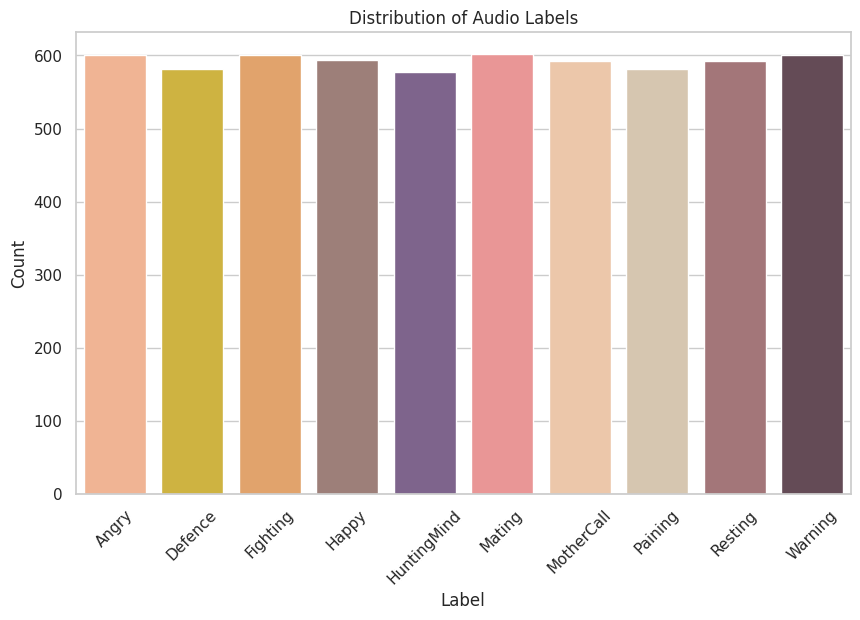

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=all_categories, y=counts, palette=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Audio Labels')
plt.xticks(rotation=45)

plt.show()

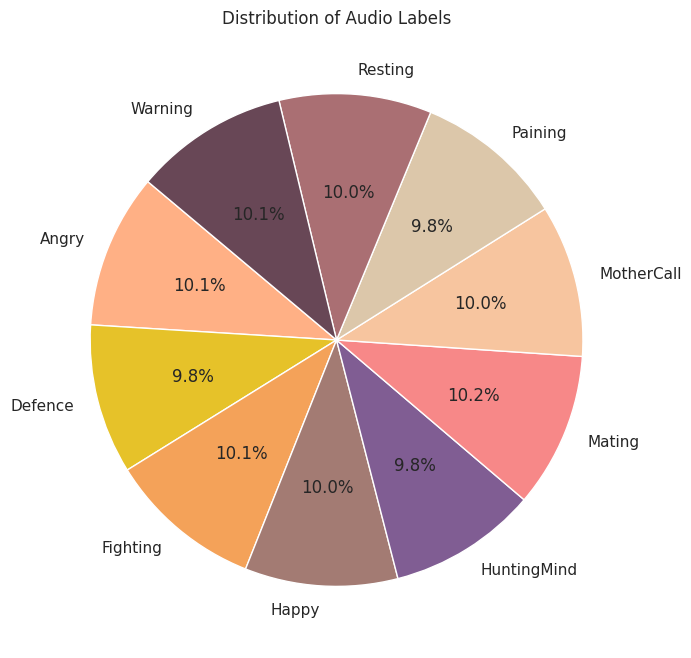

In [ ]:
total = sum(counts)
proportions = [(count/total) for count in counts]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=all_categories, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Distribution of Audio Labels')
plt.show()

### Inspecting Audio length

In [7]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import os
import pandas as pd

In [1]:
def get_audio_lengths(directory):
  lengths = []
  for filename in os.listdir(directory):
    if filename.endswith(".wav"):
      filepath = os.path.join(directory, filename)
      audio = AudioSegment.from_wav(filepath)
      lengths.append(len(audio) / 1000.0)
  return lengths

In [9]:
all_categories = ['Angry', 'Defence', 'Fighting', 'Happy', 'HuntingMind', 'Mating', 'MotherCall', 'Paining', 'Resting', 'Warning']
all_lengths = []
base_dir = 'catsound_wav/'
for category in all_categories:
  dir_path = os.path.join(base_dir, category)
  lengths = get_audio_lengths(dir_path)
  all_lengths.append(lengths)

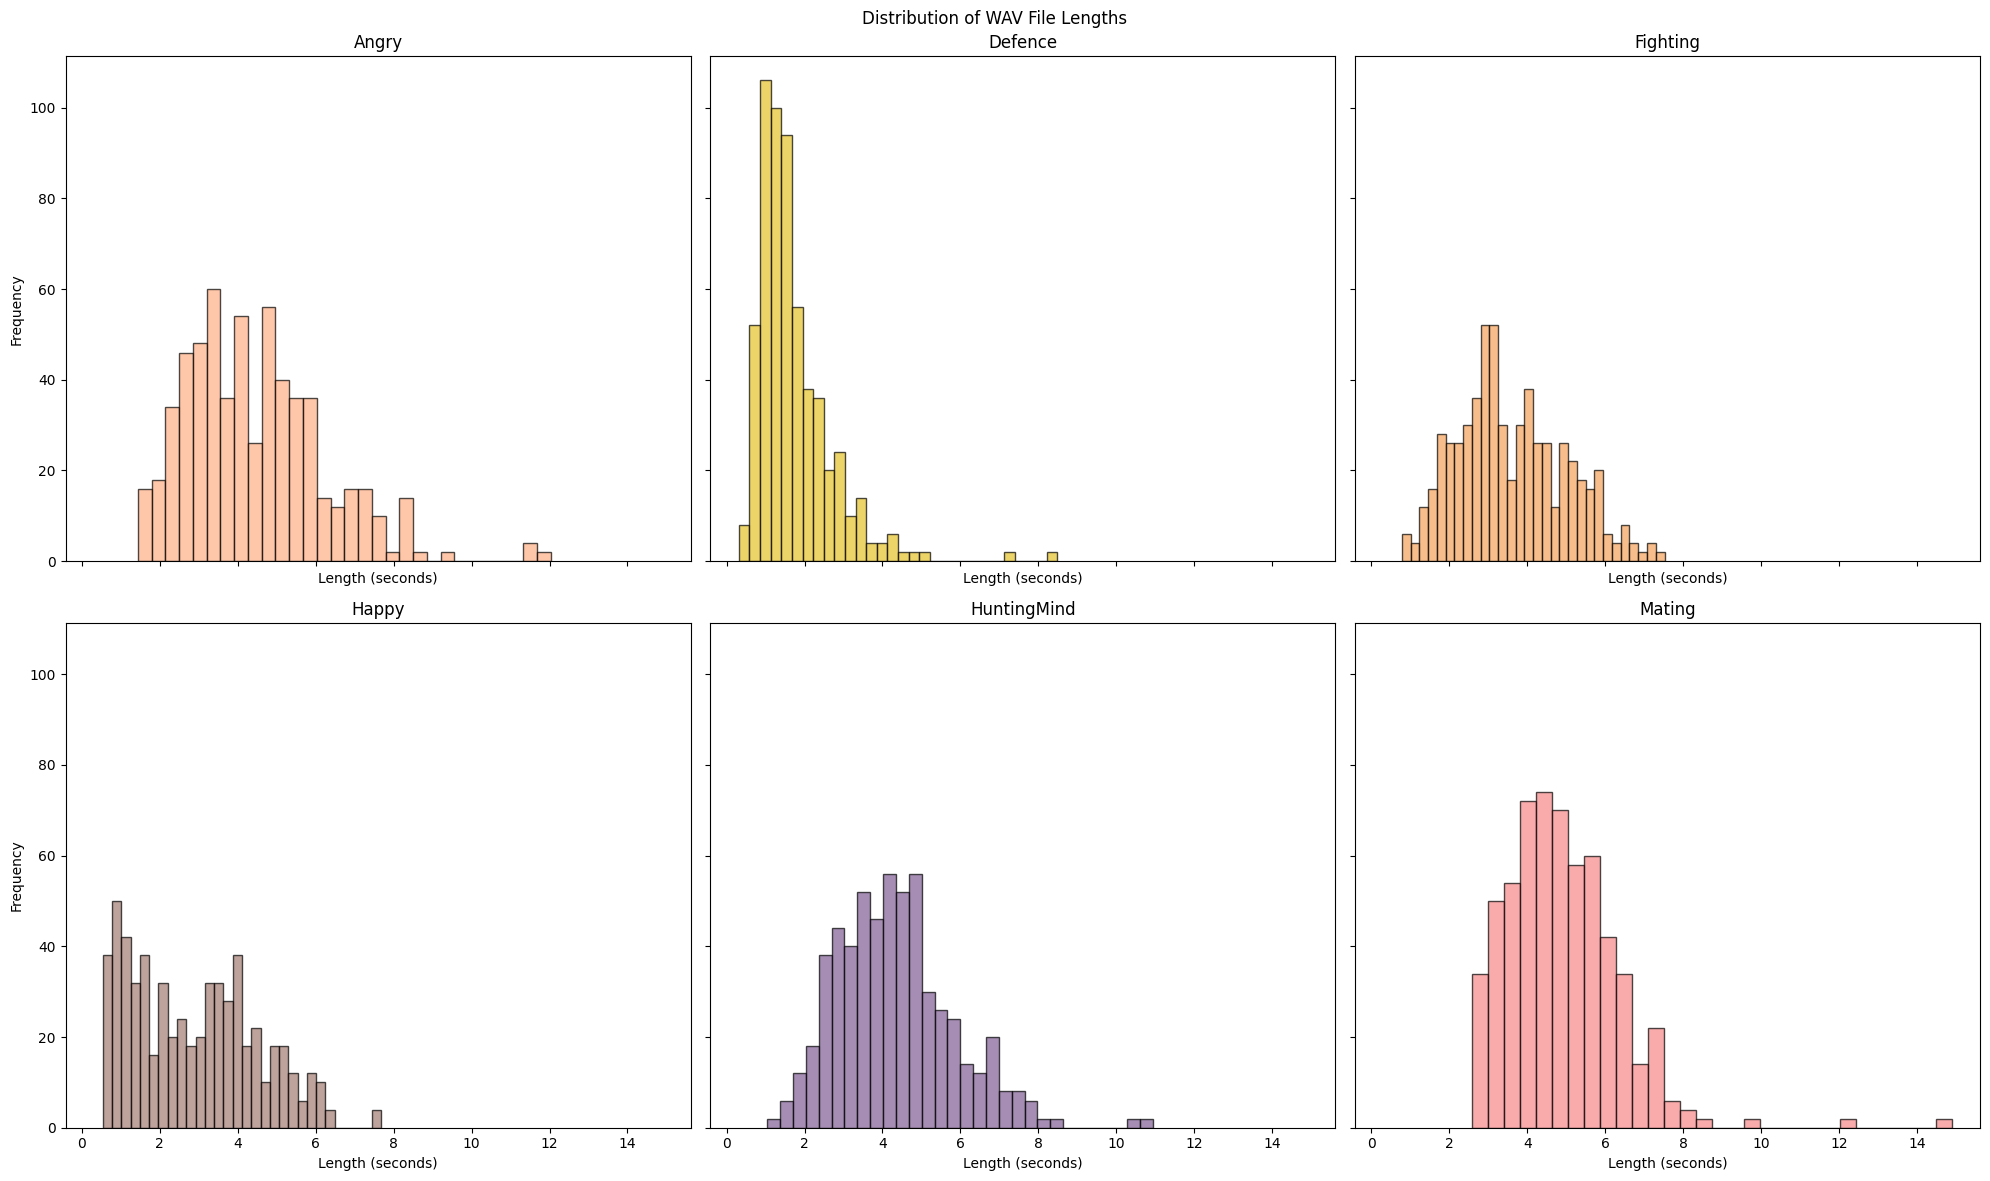

In [43]:
i_list = [0,0,0,1,1,1]
j_list = [0,1,2,0,1,2]

fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharex = True, sharey = True)
fig.suptitle("Distribution of WAV File Lengths")
axes[0,0].set_ylabel("Frequency")
axes[1,0].set_ylabel("Frequency")

for length, label, color, i, j in zip(all_lengths, all_categories, colors, i_list, j_list):
  axes[i, j].hist(length, bins=30, alpha=0.7, color = color, edgecolor='black')
  axes[i, j].set_xlabel('Length (seconds)')
  axes[i, j].set_title(label)

plt.tight_layout()

## Converting Audio to Visual

In [41]:
import numpy as np

In [105]:
def plot_waveform(wave_file, width, height, lineweight):
    """input .wav file and plot it as a waveform"""
    sampling_rate, samples = wavfile.read(wave_file)
    #the duration of the audio file in seconds can be computed as the number of samples divided by the sampling rate
    duration = len(samples)/sampling_rate

    x = np.linspace(0,samples.shape[0], samples.shape[0]) # create x-values for input

    # Plot data
    plt.figure(figsize = (width,height))
    plt.plot(x, samples, color='black', linewidth=lineweight);
    plt.title('Waveform')
    plt.xlabel('X')
    plt.ylabel('Y');

def plot_freq(wave_file, width, height, lineweight):
    """input .wav file and plot it as a frequency spectrum"""
    sampling_rate, samples = wavfile.read(wave_file)

    plt.figure(figsize = (width, height))
    plt.magnitude_spectrum(samples, color ='black', sides = 'twosided', linewidth=lineweight)
    plt.title("Magnitude Spectrum of the Audio")
    plt.show()

def plot_specgram(wave_file, width, height):
    """input .wav file and plot it as a spectrogram"""
    sampling_rate, samples = wavfile.read(wave_file)

    plt.figure(figsize = (width, height))
    plt.specgram(samples)
    plt.title("Spectrogram of the Audio")
    plt.show()

In [109]:
sample_wav = 'catsound_wav_mono/Angry/Cat_Angry1026_mono.wav'

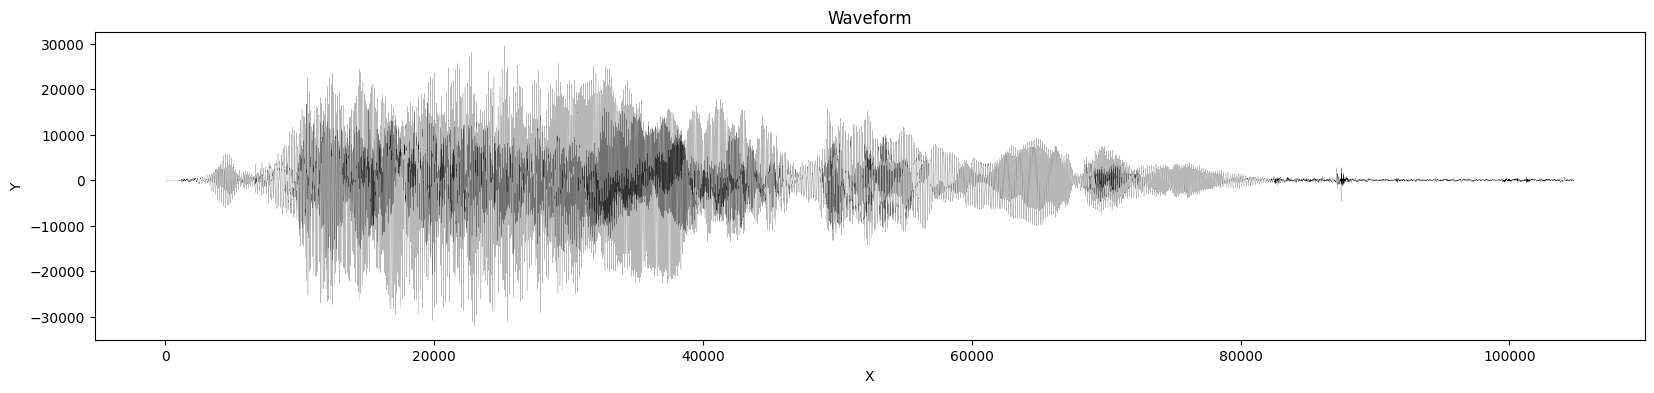

In [110]:
plot_waveform(sample_wav, 20, 4, 0.1)

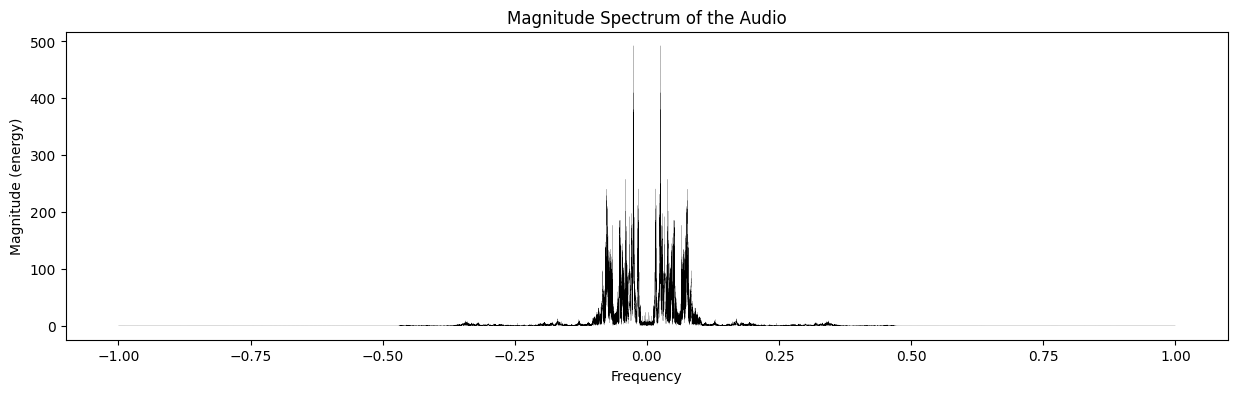

In [111]:
plot_freq(sample_wav, 15, 4, 0.1)

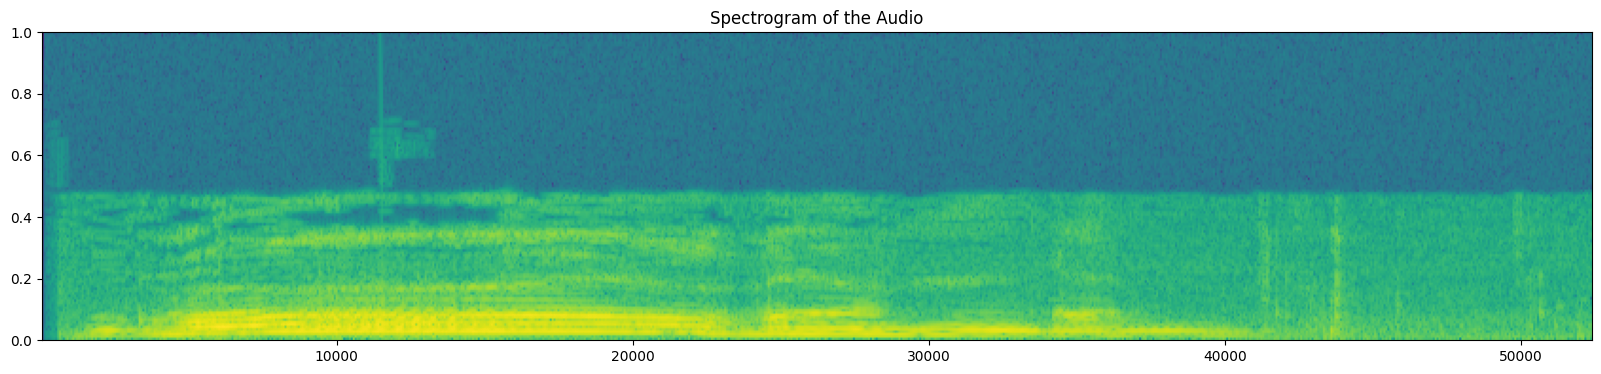

In [114]:
plot_specgram(sample_wav, 20, 4)